In [3]:
import os

project_root = os.path.abspath('..')
print(f"Проект: {project_root}")

metadata_path = '../data/raw/DF20M-metadata/'
img_folder = '../data/raw/DF20M/'

print(f"Метадані: {metadata_path}")
print(f"Зображення: {img_folder}")
print(f"Файли метаданих: {os.listdir(metadata_path) if os.path.exists(metadata_path) else 'Папка не знайдена'}")

Проект: /Users/emmayeroshek/Documents/Applied_Mashroomatics
Метадані: ../data/raw/DF20M-metadata/
Зображення: ../data/raw/DF20M/
Файли метаданих: ['DF20M-train_metadata_PROD.csv', 'DF20M-public_test_metadata_PROD.csv']


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

metadata_path = '../data/raw/DF20M-metadata/'
img_folder = '../data/raw/DF20M/'

train = pd.read_csv(metadata_path + 'DF20M-train_metadata_PROD.csv')
test = pd.read_csv(metadata_path + 'DF20M-public_test_metadata_PROD.csv')
df = pd.concat([train, test], ignore_index=True)

df['file_exists'] = df['image_path'].apply(lambda x: os.path.exists(os.path.join(img_folder, x)))

df_active = df[df['file_exists'] == True].copy()
print(f"Активних записів із фото: {len(df_active)}")

Активних записів із фото: 36393


/var/folders/zn/l7tfmw5x2n5c5l8b002km73h0000gn/T/ipykernel_1670/1869890810.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=substrate_counts.values, y=substrate_counts.index, palette='viridis')


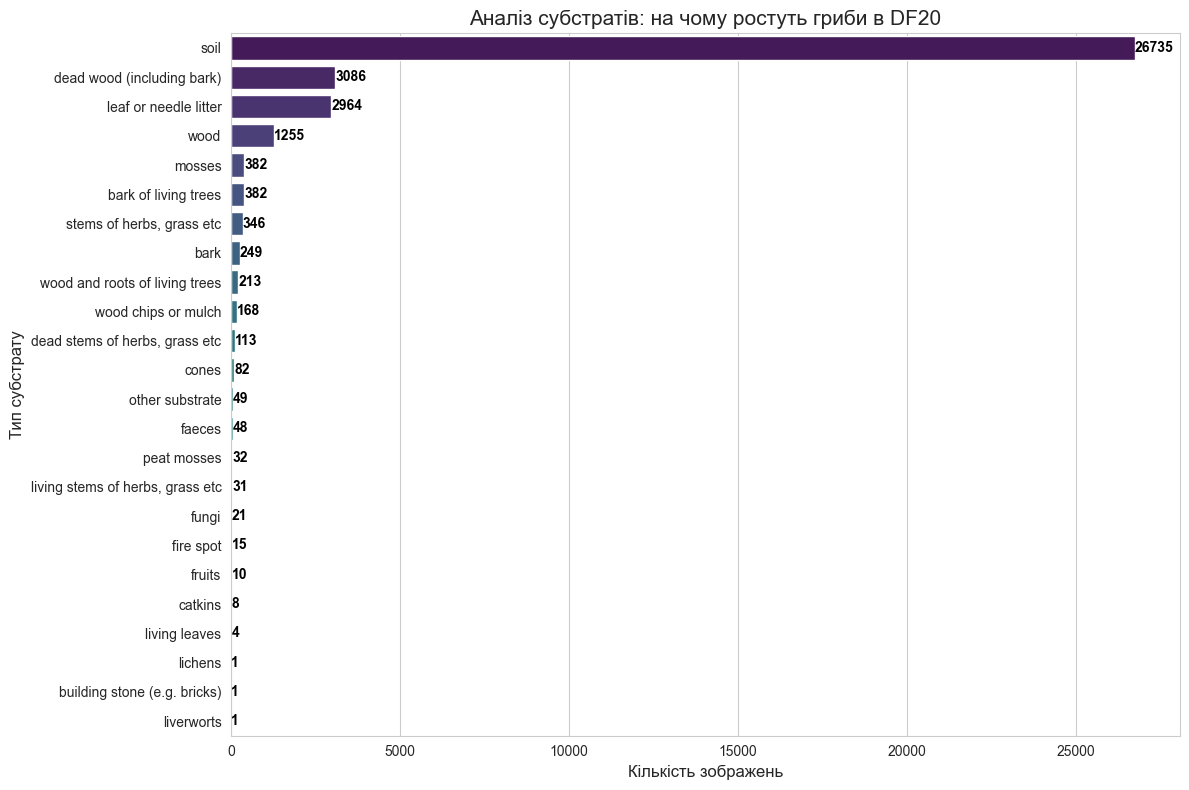

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

substrate_counts = df_active['Substrate'].value_counts()

sns.barplot(x=substrate_counts.values, y=substrate_counts.index, palette='viridis')

for i, v in enumerate(substrate_counts.values):
    plt.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Аналіз субстратів: на чому ростуть гриби в DF20', fontsize=15)
plt.xlabel('Кількість зображень', fontsize=12)
plt.ylabel('Тип субстрату', fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/zn/l7tfmw5x2n5c5l8b002km73h0000gn/T/ipykernel_1670/1886606602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=habitat_counts.values, y=habitat_counts.index, palette='viridis', ax=ax1)
/var/folders/zn/l7tfmw5x2n5c5l8b002km73h0000gn/T/ipykernel_1670/1886606602.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=habitat_pct.values, y=habitat_pct.index, palette='magma', ax=ax2)


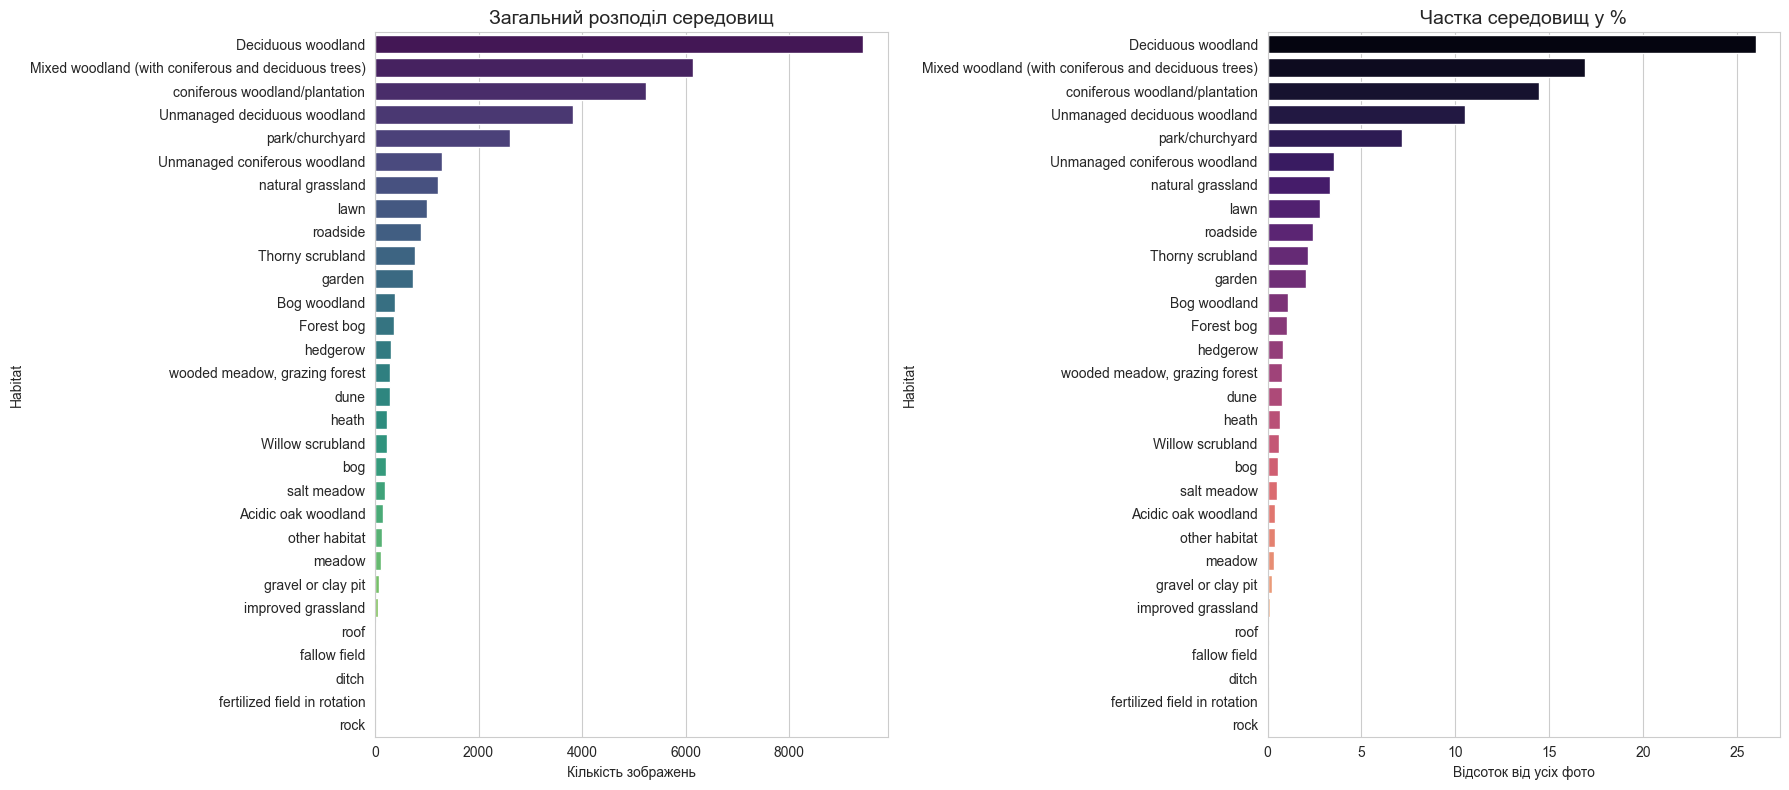

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

habitat_counts = df_active['Habitat'].value_counts()
sns.barplot(x=habitat_counts.values, y=habitat_counts.index, palette='viridis', ax=ax1)
ax1.set_title('Загальний розподіл середовищ', fontsize=14)
ax1.set_xlabel('Кількість зображень')

habitat_pct = df_active['Habitat'].value_counts(normalize=True) * 100
sns.barplot(x=habitat_pct.values, y=habitat_pct.index, palette='magma', ax=ax2)
ax2.set_title('Частка середовищ у %', fontsize=14)
ax2.set_xlabel('Відсоток від усіх фото')

plt.tight_layout()
plt.show()

Відсоток потенційно отруйних родів: 14.76%
Відсоток їстівних родів: 48.15%


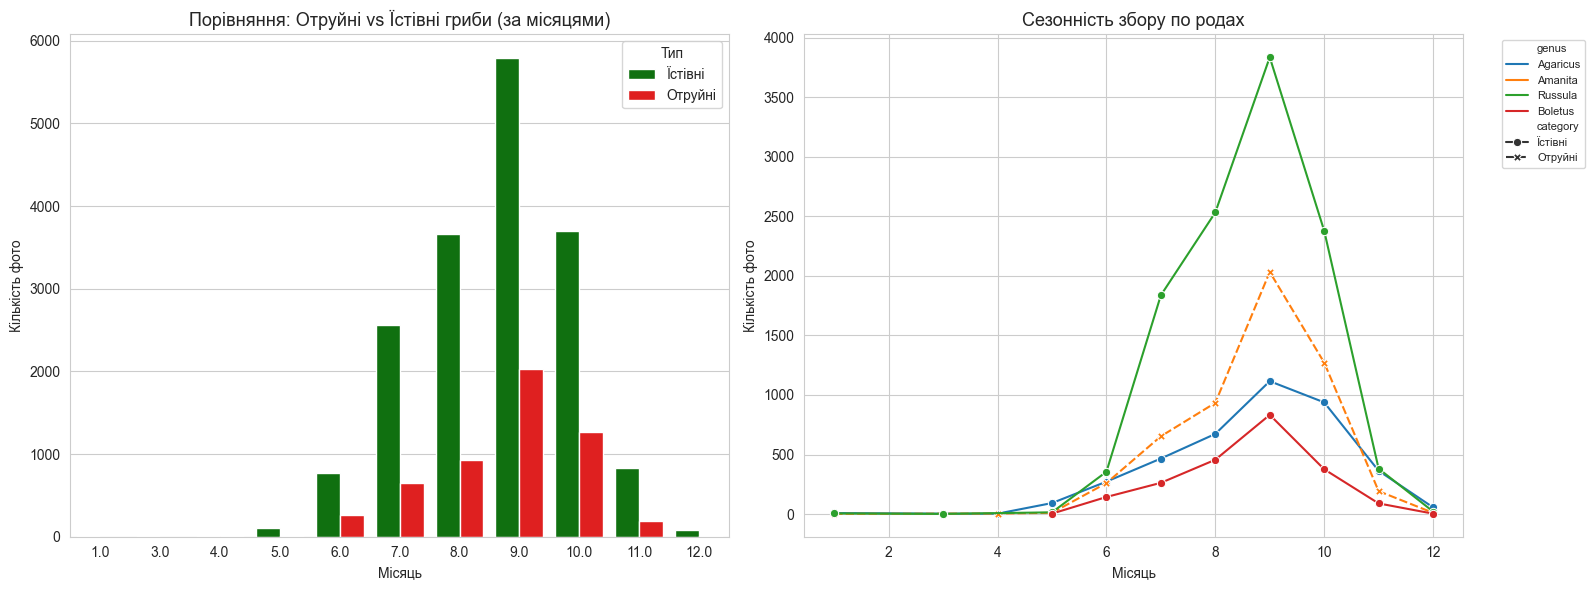

In [7]:
toxic_list = ['Amanita', 'Galerina', 'Inocybe', 'Lepiota', 'Cortinarius', 'Hypholoma']
edible_list = ['Boletus', 'Cantharellus', 'Morchella', 'Pleurotus', 'Agaricus', 'Macrolepiota', 'Lactarius', 'Russula']

df_active['is_toxic'] = df_active['genus'].isin(toxic_list)
df_active['is_edible'] = df_active['genus'].isin(edible_list)

df_active['mushroom_type'] = 'Інші'
df_active.loc[df_active['is_toxic'], 'mushroom_type'] = 'Отруйні'
df_active.loc[df_active['is_edible'], 'mushroom_type'] = 'Їстівні'

toxic_stat = df_active['is_toxic'].value_counts(normalize=True) * 100
edible_stat = df_active['is_edible'].value_counts(normalize=True) * 100
print(f"Відсоток потенційно отруйних родів: {toxic_stat.get(True, 0):.2f}%")
print(f"Відсоток їстівних родів: {edible_stat.get(True, 0):.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df_compare = df_active[df_active['mushroom_type'] != 'Інші']
sns.countplot(data=df_compare, x='month', hue='mushroom_type', 
              palette={'Отруйні': 'red', 'Їстівні': 'green'}, ax=axes[0])
axes[0].set_title('Порівняння: Отруйні vs Їстівні гриби (за місяцями)', fontsize=13)
axes[0].set_xlabel('Місяць')
axes[0].set_ylabel('Кількість фото')
axes[0].legend(title='Тип')


df_toxic_edible = df_active[df_active['genus'].isin(toxic_list + edible_list)]
df_toxic_edible['category'] = df_toxic_edible['genus'].apply(
    lambda x: 'Отруйні' if x in toxic_list else 'Їстівні'
)

monthly_genus = df_toxic_edible.groupby(['month', 'genus', 'category']).size().reset_index(name='count')
sns.lineplot(data=monthly_genus, x='month', y='count', hue='genus', 
             style='category', markers=True, ax=axes[1])
axes[1].set_title('Сезонність збору по родах', fontsize=13)
axes[1].set_xlabel('Місяць')
axes[1].set_ylabel('Кількість фото')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

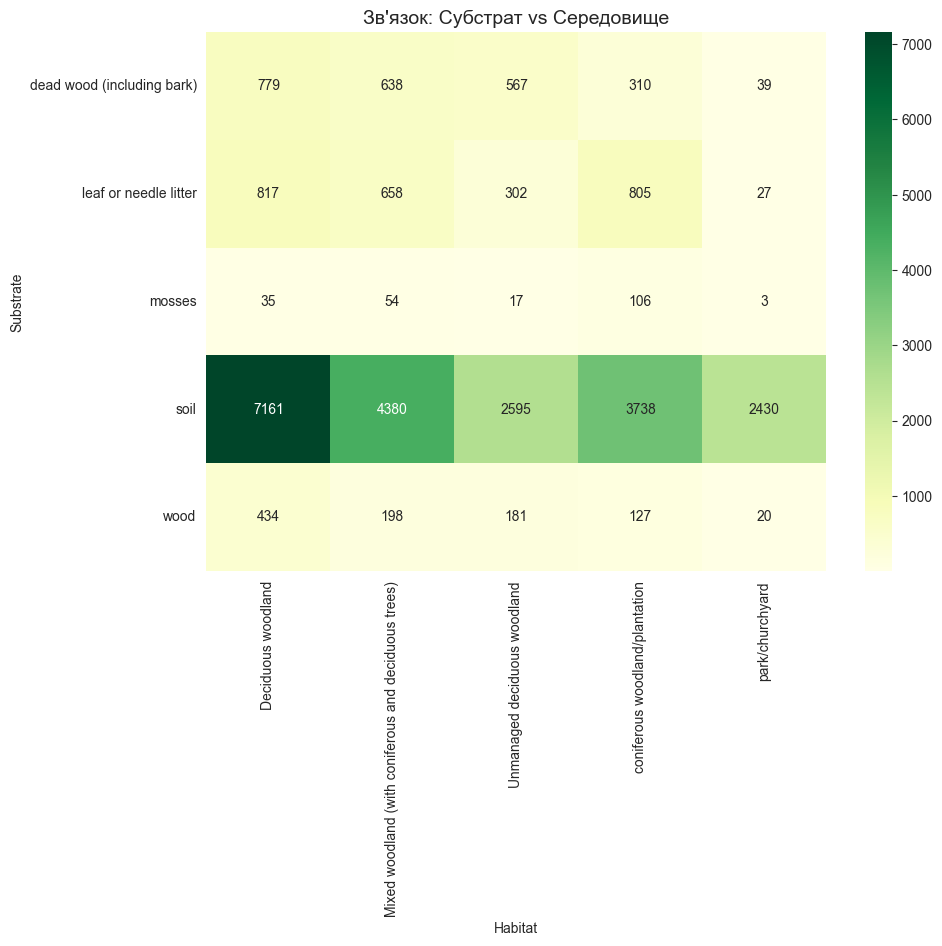

In [8]:
top_h = df_active['Habitat'].value_counts().head(5).index
top_s = df_active['Substrate'].value_counts().head(5).index

pivot_table = pd.crosstab(df_active[df_active['Substrate'].isin(top_s)]['Substrate'],
                          df_active[df_active['Habitat'].isin(top_h)]['Habitat'])

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGn")
plt.title('Зв\'язок: Субстрат vs Середовище', fontsize=14)
plt.show()

100%|██████████| 500/500 [00:00<00:00, 937.59it/s]


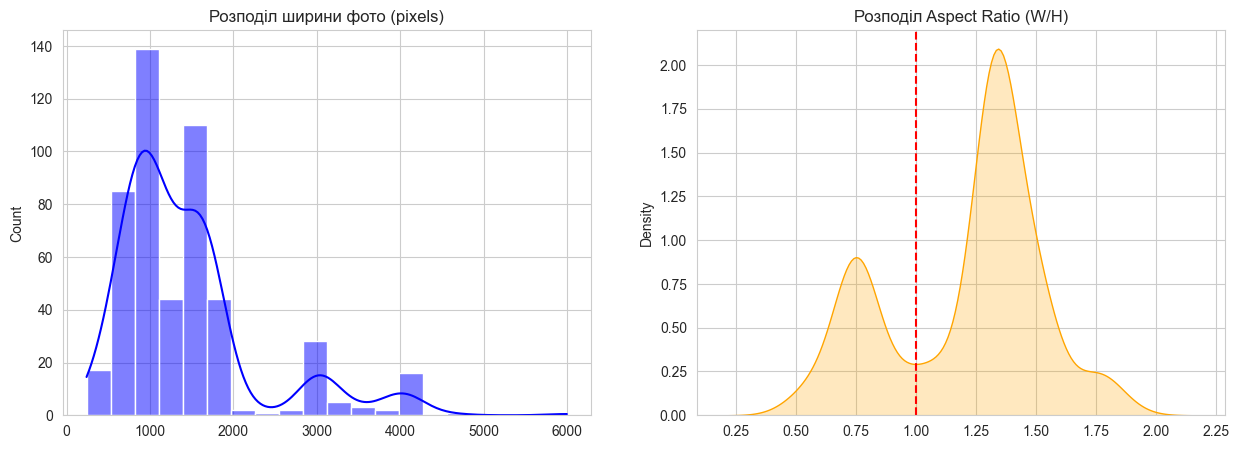

In [9]:
from PIL import Image
from tqdm import tqdm

img_folder = '../data/raw/DF20M/'

sample_images = df_active['image_path'].sample(500)
widths, heights, ratios = [], [], []

for img_p in tqdm(sample_images):
    full_p = os.path.join(img_folder, img_p)
    with Image.open(full_p) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)
        ratios.append(w/h)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(widths, bins=20, ax=ax[0], color='blue', kde=True)
ax[0].set_title('Розподіл ширини фото (pixels)')

sns.kdeplot(ratios, fill=True, ax=ax[1], color='orange')
ax[1].set_title('Розподіл Aspect Ratio (W/H)')
ax[1].axvline(1.0, color='red', linestyle='--')

plt.show()

In [10]:
import pandas as pd
import numpy as np
import os
from PIL import Image

metadata_path = '../data/raw/DF20M-metadata/'
img_folder = '../data/raw/DF20M/'

train = pd.read_csv(metadata_path + 'DF20M-train_metadata_PROD.csv')
test = pd.read_csv(metadata_path + 'DF20M-public_test_metadata_PROD.csv')
df = pd.concat([train, test], ignore_index=True)

df['file_exists'] = df['image_path'].apply(lambda x: os.path.exists(os.path.join(img_folder, x)))
df_active = df[df['file_exists'] == True].copy()

print(f"Активних записів із фото: {len(df_active)}")

species_counts = df_active['species'].value_counts()
rare_species_count = (species_counts < 20).sum()
total_species = len(species_counts)

print(f"\nУвага: {rare_species_count} видів мають менше 20 зображень.")
print(f"Це {(rare_species_count / total_species)*100:.1f}% від усіх видів датасету.")

print("\nРозрахунок Mean/Std для препроцесингу")
sample_pixels = []
for img_p in df_active['image_path'].sample(100):
    full_path = os.path.join(img_folder, img_p)
    img = Image.open(full_path).convert('RGB')
    sample_pixels.append(np.array(img).reshape(-1, 3))

pixels = np.concatenate(sample_pixels, axis=0) / 255.0
mean = pixels.mean(axis=0)
std = pixels.std(axis=0)

print(f"✅ Mean: {mean}")
print(f"✅ Std: {std}")

Активних записів із фото: 36393

Увага: 0 видів мають менше 20 зображень.
Це 0.0% від усіх видів датасету.

Розрахунок Mean/Std для препроцесингу
✅ Mean: [0.43984585 0.42991606 0.34909089]
✅ Std: [0.26175582 0.25255279 0.25779405]


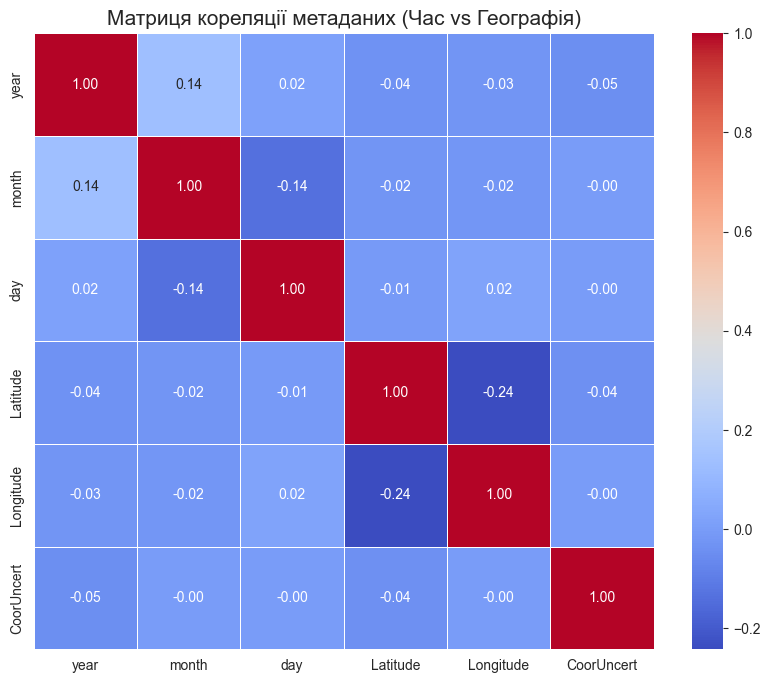

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr_matrix = df_active[['year', 'month', 'day', 'Latitude', 'Longitude', 'CoorUncert']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матриця кореляції метаданих (Час vs Географія)', fontsize=15)
plt.show()

<Axes: title={'center': 'Кількість фото на один екземпляр'}>

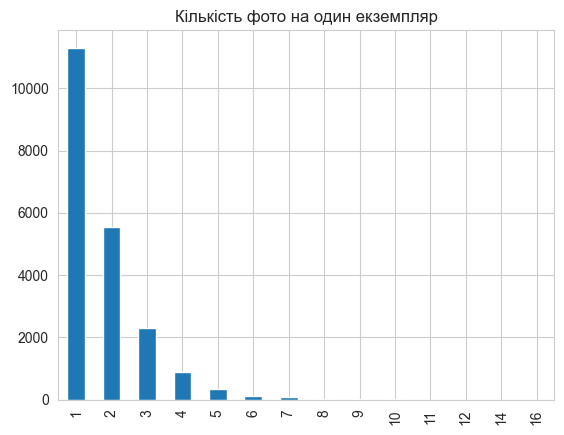

In [13]:
counts = df.groupby('gbifID').size() 
counts.value_counts().plot(kind='bar', title='Кількість фото на один екземпляр')

In [14]:
import plotly.express as px
fig = px.treemap(df, path=['family', 'genus'], title='Ієрархія грибів у датасеті')
fig.show()

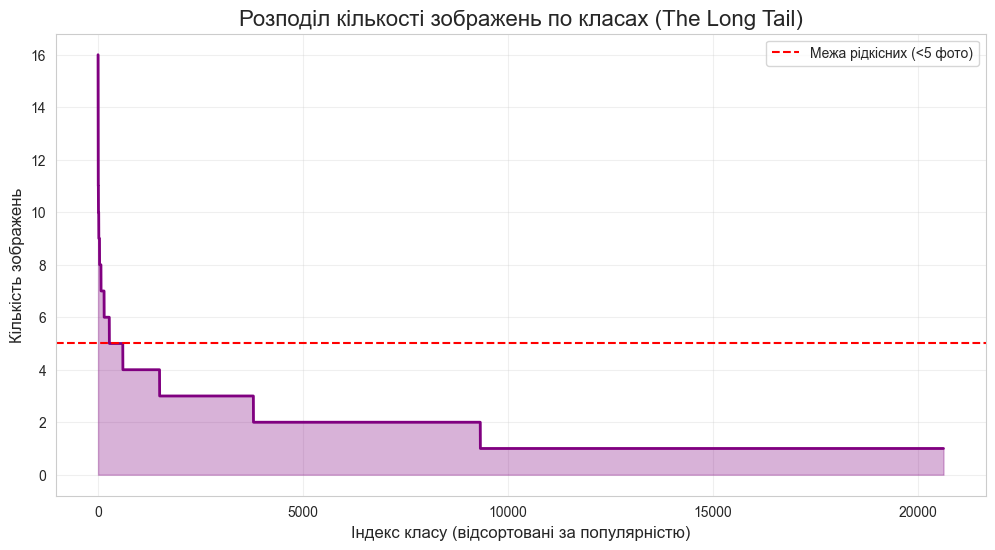

📉 Всього класів: 20618
😱 Класів, де менше 5 фото: 20014 (97.1% від усіх!)


In [15]:
import matplotlib.pyplot as plt

class_counts = df['gbifID'].value_counts()

plt.figure(figsize=(12, 6))
plt.plot(range(len(class_counts)), class_counts.values, color='purple', linewidth=2)
plt.fill_between(range(len(class_counts)), class_counts.values, color='purple', alpha=0.3) 

plt.title('Розподіл кількості зображень по класах (The Long Tail)', fontsize=16)
plt.xlabel('Індекс класу (відсортовані за популярністю)', fontsize=12)
plt.ylabel('Кількість зображень', fontsize=12)
plt.grid(True, alpha=0.3)

threshold = 5
rare_classes = sum(class_counts < threshold)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Межа рідкісних (<{threshold} фото)')
plt.legend()

plt.show()

print(f"📉 Всього класів: {len(class_counts)}")
print(f"😱 Класів, де менше {threshold} фото: {rare_classes} ({rare_classes/len(class_counts):.1%} від усіх!)")